In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pathlib import Path

In [54]:
CURRENT_DIR = Path.cwd()
PARENT_DIR = CURRENT_DIR.parent
DATA_DIR = PARENT_DIR / "T00_data"
print(CURRENT_DIR)
print(DATA_DIR)

c:\Users\admin\Coding\research\weld-ml\src\P02_data\T01_explore
c:\Users\admin\Coding\research\weld-ml\src\P02_data\T00_data


In [55]:
filepath_AA6061 = os.path.join(
    DATA_DIR, "residual_stress", "pre_welding", "Pre_RS (AA6061-T6)_v2.xlsx"
)
filepath_AA5052 = os.path.join(
    DATA_DIR, "residual_stress", "pre_welding", "Pre_RS (AA5052-H32)_v2.xlsx"
)
pre_AA6061 = pd.read_excel(filepath_AA6061)
pre_AA5052 = pd.read_excel(filepath_AA5052)

# Add index to the original row number
pre_AA6061.insert(0, "idx_excel", range(2, 2 + pre_AA6061.shape[0]))
pre_AA5052.insert(0, "idx_excel", range(2, 2 + pre_AA5052.shape[0]))

In [58]:
pre_AA6061

,idx_excel,Sigma(x),Tau(xy),FWHM,Gamma(Ri),Gamma(Rv),Comment 1,Comment 2,Folder,Date,Time,Sigma(x) (Error),excluded
0,2,-19,10,2.98,---,---,AA6061_1_1,"R1400,W60,D10",FSW_Parn,2025-11-02,23:45:00,57,NaN
1,3,-79,47,2.82,---,---,AA6061_1_2,"R1400,W60,D10",FSW_Parn,2025-11-02,23:52:00,49,NaN
2,4,32,-27,2.76,---,---,AA6061_1_3,"R1400,W60,D10",FSW_Parn,2025-11-03,00:03:00,68,NaN
3,5,63,-9,2.91,---,---,AA6061_1_4,"R1400,W60,D10",FSW_Parn,2025-11-03,00:07:00,73,NaN
4,6,46,70,2.68,---,---,AA6061_1_5,"R1400,W60,D10",FSW_Parn,2025-11-03,00:13:00,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,375,25,41,2.70,---,---,AA6061_54_3,"R1600,W80,D20",FSW_Parn,2025-11-08,05:34:00,153,NaN
374,376,-18,13,2.62,---,---,AA6061_54_4,"R1600,W80,D20",FSW_Parn,2025-11-08,05:39:00,98,NaN
375,377,-34,-3,2.56,---,---,AA6061_54_5,"R1600,W80,D20",FSW_Parn,2025-11-08,05:45:00,46,NaN
376,378,72,-23,2.67,---,---,AA6061_54_6,"R1600,W80,D20",FSW_Parn,2025-11-08,05:52:00,79,NaN


In [59]:
# Split grade and sample no and location


def split_data_1(el):
    sps = el.split("_")
    section = sps[0]
    sample_no = int(sps[1])
    location = int(sps[2])
    return section, sample_no, location


pre_AA6061[["section", "sample_no", "location"]] = pre_AA6061["Comment 1"].apply(
    lambda x: pd.Series(split_data_1(x))
)
pre_AA5052[["section", "sample_no", "location"]] = pre_AA5052["Comment 1"].apply(
    lambda x: pd.Series(split_data_1(x))
)

In [60]:
# Split data based on rotational speed, welding speed, dwell time


def split_data_2(el):
    sps = el.split(",")
    rotational_speed = int(sps[0][1:])
    welding_speed = int(sps[1][1:])
    dwell_time = int(sps[2][1:])
    return rotational_speed, welding_speed, dwell_time


pre_AA6061[["R", "W", "D"]] = pre_AA6061["Comment 2"].apply(
    lambda x: pd.Series(split_data_2(x))
)
pre_AA5052[["R", "W", "D"]] = pre_AA5052["Comment 2"].apply(
    lambda x: pd.Series(split_data_2(x))
)

In [61]:
pre_AA5052.columns.values

array(['idx_excel', 'Sigma(x)', 'Tau(xy)', 'FWHM', 'Gamma(Ri)',
       'Gamma(Rv)', 'Comment 1', 'Comment 2', 'Folder', 'Date', 'Time',
       'Sigma(x) (Error)', 'excluded', 'section', 'sample_no', 'location',
       'R', 'W', 'D'], dtype=object)

In [62]:
pre_AA6061.columns.values

array(['idx_excel', 'Sigma(x)', 'Tau(xy)', 'FWHM', 'Gamma(Ri)',
       'Gamma(Rv)', 'Comment 1', 'Comment 2', 'Folder', 'Date', 'Time',
       'Sigma(x) (Error)', 'excluded', 'section', 'sample_no', 'location',
       'R', 'W', 'D'], dtype=object)

In [63]:
cols = [
    "idx_excel",
    "section",
    "sample_no",
    "location",
    "R",
    "W",
    "D",
    "Sigma(x)",
    "FWHM",
]

In [64]:
dfm = pd.concat([pre_AA6061[cols], pre_AA5052[cols]], ignore_index=True)
dfm

,idx_excel,section,sample_no,location,R,W,D,Sigma(x),FWHM
0,2,AA6061,1,1,1400,60,10,-19,2.98
1,3,AA6061,1,2,1400,60,10,-79,2.82
2,4,AA6061,1,3,1400,60,10,32,2.76
3,5,AA6061,1,4,1400,60,10,63,2.91
4,6,AA6061,1,5,1400,60,10,46,2.68
...,...,...,...,...,...,...,...,...,...
751,375,AA5052,54,3,1600,80,20,-14,2.50
752,376,AA5052,54,4,1600,80,20,-18,2.51
753,377,AA5052,54,5,1600,80,20,-3,2.50
754,378,AA5052,54,6,1600,80,20,-7,2.50


<Axes: xlabel='location', ylabel='Sigma(x)'>

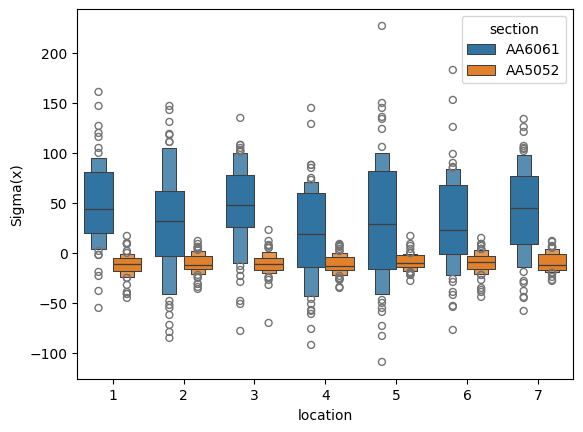

In [65]:
sns.boxenplot(data=dfm, x="location", y="Sigma(x)", hue="section")

In [66]:
# Save to excel

dfm.to_excel("S01_residual_stress_pre_weld.xlsx", index=False)